In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


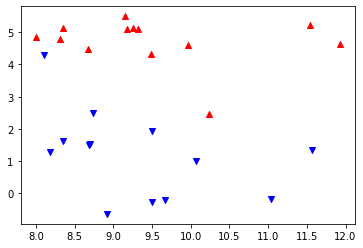

In [4]:
X, y = mglearn.datasets.make_forge()

plt.scatter(X[y==1, 0], X[y==1, 1], marker='^', color='red')
plt.scatter(X[y==0, 0], X[y==0,1], marker='v', color='blue')
plt.show()

0.9230769230769231
0.9230769230769231


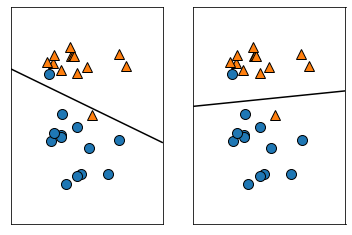

In [5]:
lr = LogisticRegression()
lr.fit(X, y)
print(lr.score(X, y))
svc = LinearSVC(max_iter=10000) # 규제 l2나 l1줄 수 있음 # 규제가 커지면 커질 수록 일반화 성능 높아지는 것(과대적합이 아님, 가중치 줄여주는것) # default penalty = l2, default c=1
svc.fit(X,y)
print(svc.score(X, y))

fig, axes = plt.subplots(1, 2) # 1행 2열의 그래프를 그리겠다
for model, ax in zip([lr, svc], axes): # (lr, ax1), (svc, ax2) 출력
    mglearn.plots.plot_2d_separator(model, X, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
plt.show() # lr / svc로 나옴 (default값 c=1)

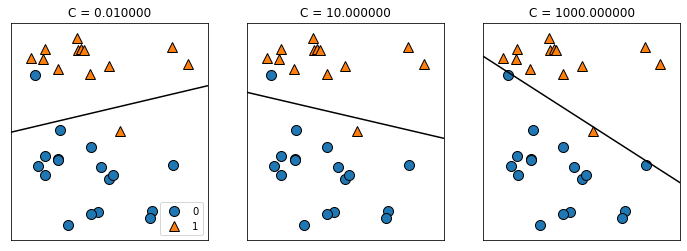

In [6]:
mglearn.plots.plot_linear_svc_regularization() # 규제가 바뀌었을 때(선을 바꾸는 것) 어떤식으로 반응하는지.# c깂과 규제 강도는 반비례 관게

In [7]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [16]:
# np.unique(y, return_counts=True) # 불균형하다면 (비슷하지 않다면) stratify
for C in [0.01,0.1, 1, 10, 100]:
    lr = LogisticRegression(C=C, max_iter=1000000)
    lr.fit(X_train, y_train)
    print(C, ' : ', lr.score(X_train, y_train), lr.score(X_test, y_test))


0.01  :  0.9530516431924883 0.951048951048951
0.1  :  0.9507042253521126 0.951048951048951
1  :  0.9577464788732394 0.958041958041958
10  :  0.9741784037558685 0.965034965034965
100  :  0.9835680751173709 0.965034965034965


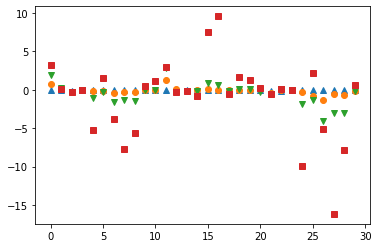

In [19]:
for C, m in zip([0.01,1, 10, 100],['^', 'o', 'v', 's']): # 값이 커질 수록 규제 낮아짐(불명확)
    lr = LogisticRegression(C=C, max_iter=10000)
    lr.fit(X_train, y_train)
#     print(lr.coef_)
    plt.plot(lr.coef_[0], m)

In [12]:
for C in [0.01, 0.1, 1, 10, 100]: # 값이 커질 수록 규제 낮아짐(불명확) # 0.1규제가 최적점
    svc = LinearSVC(C=C, max_iter=1000000)
    svc.fit(X_train, y_train)
    print(C, ' : ', svc.score(X_train, y_train), svc.score(X_test, y_test)) # lr이 더좋다.

0.01  :  0.9483568075117371 0.9440559440559441


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1  :  0.960093896713615 0.958041958041958


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1  :  0.9483568075117371 0.951048951048951


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10  :  0.9553990610328639 0.951048951048951
100  :  0.931924882629108 0.951048951048951


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
import statsmodels.api as sm

In [26]:
ds = sm.datasets.fair.load_pandas()
data = ds.data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [43]:
data['affairs'] = (data['affairs']==0)
# data['affairs'] = (data['affairs']==0).astype(bool) # 0은 false, true는 1
data['affairs']

0        True
1        True
2        True
3        True
4        True
        ...  
6361    False
6362    False
6363    False
6364    False
6365    False
Name: affairs, Length: 6366, dtype: bool

In [46]:
data.shape[0]
4313/6366 # 30% 이상의 사람들이 특이사항이 있다.

0.6775054979579014

In [45]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,True


In [52]:
X = data[['rate_marriage', 'yrs_married', 'children', 'religious', 'educ']]
y = data['affairs'].astype(int) # T/F 를 0과 1로 바꿔주기

In [53]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int32

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [60]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled, X_test_scaled = mms.transform(X_train), mms.transform(X_test)

In [65]:
for C in [0.01, 1, 100, 10000, 100000]: # 한계가 있다. 과소적합
    lr = LogisticRegression(C=C)
    lr.fit(X_train_scaled, y_train)
    print(lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test))

0.6971093422706326 0.6959798994974874
0.7241307080016758 0.7085427135678392
0.7245496439044826 0.7097989949748744
0.724759111855886 0.7110552763819096
0.724759111855886 0.7110552763819096


In [69]:
for C in [0.01, 1, 100, 10000]:
    svc = LinearSVC(C=C, max_iter=100000)
    svc.fit(X_train_scaled, y_train)
    print(svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test))

0.7197318810222036 0.7091708542713567
0.7222454964390448 0.7091708542713567
0.7220360284876414 0.7091708542713567
0.7214076246334311 0.7135678391959799


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
from sklearn.datasets import load_iris

In [71]:
iris = load_iris()

In [77]:
print(iris['data'][:3], iris['target'][:3])
print(np.unique(iris['target']), iris['target_names']) # 분류할 것 3개

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [0 0 0]
[0 1 2] ['setosa' 'versicolor' 'virginica']


In [79]:
X, y = iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [88]:
lr = LogisticRegression(C=1, max_iter=10000) #기본이 최적화(C=1) ,C=0.1 하면 더 내려감
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9732142857142857, 0.9473684210526315)

In [99]:
svc = LinearSVC(C=10, max_iter=10000) # c=10에서 테스트 성능 극대화 , lr이 더 좋다
svc.fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.9642857142857143, 0.9736842105263158)

In [100]:
print(lr.predict(X[[0, 50, 100]]), y[[0, 50, 100]]) # 서로 다른 분류
print(svc.predict(X[[0, 50, 100]]), y[[0, 50, 100]]) # 잘 분류하고 있다. 

[0 1 2] [0 1 2]
[0 1 2] [0 1 2]
